# TP2 Audionumérique Parole et Musique (3EN ENSEEIHT)

**NOM** : MACHADO ; ZAMBRANA

**Prénom** : Pedro ; Rodrigo

**Email** : pedro.machadosantosrohde@etu.enseeiht.fr ; rodrigo.zambranaprado@etu.enseeiht.fr

Initialisation de l'environnement de TP

In [1]:
# OS setup
#!cat /etc/os-release
!apt-get install -qq bc tree sox

# Liaison avec les données
!git clone https://gitlab.com/jeromefarinas/tp-3en-n7.git
  
# Spectrum
!pip install spectrum

Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 132684 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../1-libopencore-amrwb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libmagic-mgc.
Preparing to unpack .../2-libmagic-mgc_1%3a5.32-2ubuntu0.3_amd64.deb ...
Unpacking libmagic-mgc (1:5.32-2ubuntu0.3) ...
Selecting previously unselected package libmagic1:amd64.
Preparing to unpack .../3-libmagic1_1%3a5.32-2ubuntu0.3_amd64.deb ...
Unpacking libmagic1:amd64 (1:5.32-2ubuntu0.3) ...
Selecting previously unselected package bc.
Preparing to unpack .../4-bc_1.07.1-2_amd64.deb ...
Unpacking bc (1.07.1-2) ...
Selecting previously unselected package libsox3:amd64.
Preparing to unpack .../5

In [0]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import scipy.signal
import numpy as np
from IPython.display import Audio

In [3]:
!tree tp-3en-n7/signaux/alpha/

tp-3en-n7/signaux/alpha/
├── mots_inconnus
│   ├── alpha.wav
│   ├── bravo.wav
│   ├── charlie.wav
│   ├── delta.wav
│   ├── echo.wav
│   ├── foxtrott.wav
│   ├── golf.wav
│   ├── hotel.wav
│   ├── india.wav
│   ├── juliett.wav
│   ├── kilo.wav
│   ├── lima.wav
│   └── mike.wav
└── references
    ├── alpha.wav
    ├── bravo.wav
    ├── charlie.wav
    ├── delta.wav
    ├── echo.wav
    ├── foxtrott.wav
    ├── golf.wav
    ├── hotel.wav
    ├── india.wav
    ├── juliett.wav
    ├── kilo.wav
    ├── lima.wav
    └── mike.wav

2 directories, 26 files


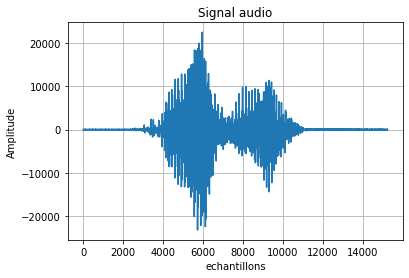

In [4]:
(fe,signal) =  scipy.io.wavfile.read("tp-3en-n7/signaux/alpha/references/bravo.wav")
# Affichage du signal
plt.figure(1)
plt.plot(np.arange(len(signal)),signal)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Signal audio')
plt.grid(True)
plt.show()
# lecture du fichier
Audio(data=signal, rate=fe)

Nous allons commencer par travailler sur un extrait voisé du signal :

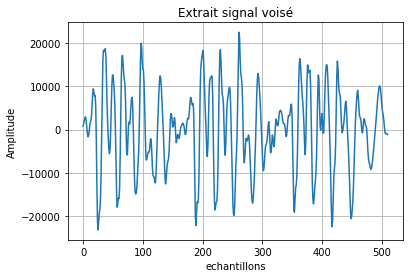

In [5]:
extrait = signal[5700:6211]
# Affichage du signal
plt.figure(1)
plt.plot(np.arange(len(extrait)),extrait)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Extrait signal voisé')
plt.grid(True)
plt.show()

***Affichez une fenetre hamming de 512 points. Puis créez la variable extrait_fenetre qui resulte de la multiplication point par point de la fenetre de hamming et de l'extrait de signal. Affichez le signal résultant.***

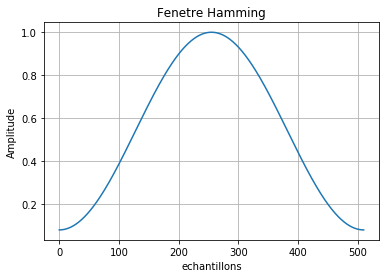

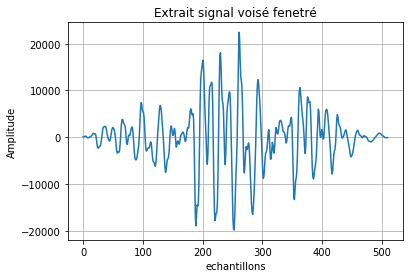

In [10]:
# a vous
w = np.hamming(511)
extrait_fenetre = np.multiply(w,extrait)

plt.figure(1)
plt.plot(np.arange(len(w)),w)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Fenetre Hamming')
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(np.arange(len(extrait_fenetre)),extrait_fenetre)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Extrait signal voisé fenetré')
plt.grid(True)
plt.show()

***Affichez le spectre de puissance de la transformée de Fourier de l'extrait fenetré. Représentez les fréquences en abscisse. Vous pouvez utiliser la fonction np.fft.fft pour calculer la transformée de Fourier ou bien utiliser son équivalent sur librosa.***

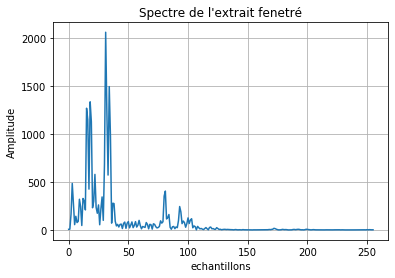

In [65]:
# A vous...
sp = 1/511*np.abs(np.fft.fft(extrait_fenetre))
#sp = 20.0*np.log10(sp)
plt.figure(1)
plt.plot(np.arange(len(sp)/2),sp[:256])
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Spectre de l\'extrait fenetré')
plt.grid(True)
plt.show()

***Affichez un spectrogramme du signal de départ.***

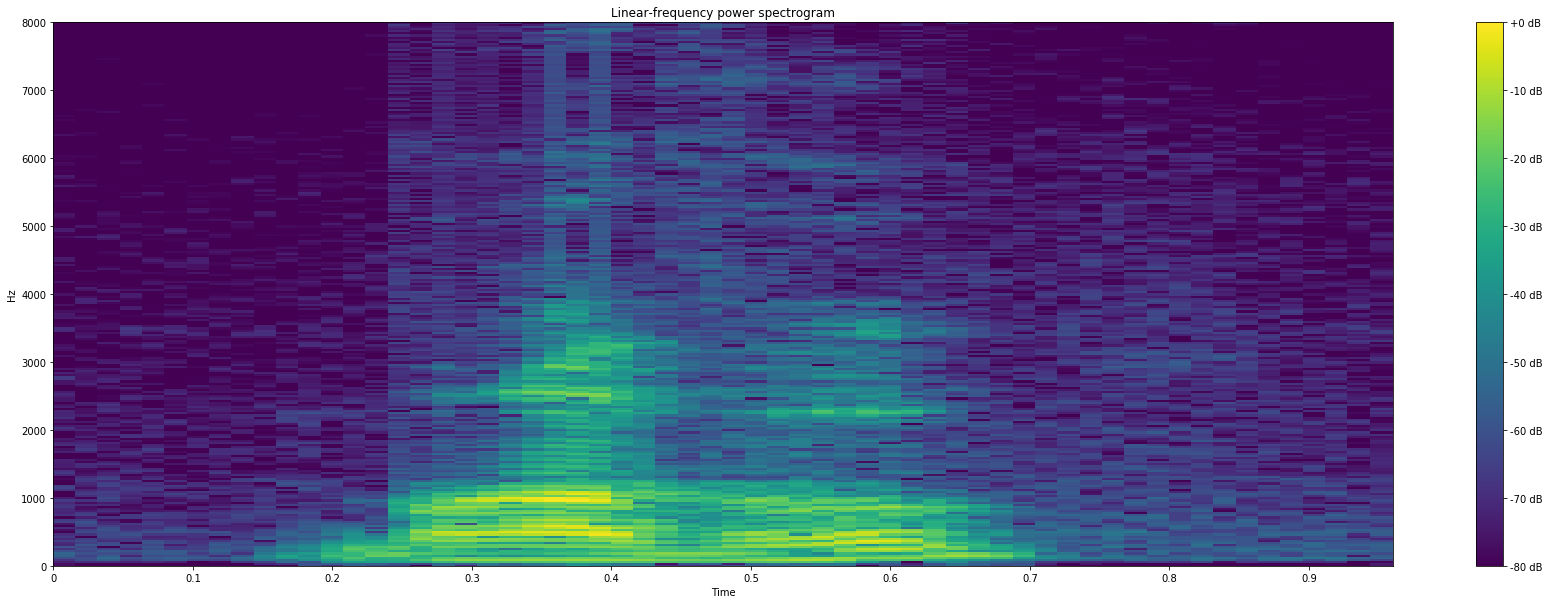

In [32]:
# A vous...
import librosa
import librosa.display
# d, sr = librosa.load('tp-3en-n7/signaux/Loc1V1.wav', sr=16000, mono=True)
sp = np.abs(librosa.stft(np.array(signal,dtype='float32')/32767, n_fft=512, hop_length=256, window=np.hamming(512 + 2)[1:-1]))
sp = 20.0 * np.log10(np.maximum(sp, np.max(sp) / 1e6))
sp = sp - np.mean(sp)
sp = sp - np.max(sp)
plt.figure(figsize=(30,10))
librosa.display.specshow(sp, sr=fe, hop_length=256, y_axis='linear', x_axis='time', cmap='viridis', vmin=-80.0, vmax=0)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

***Calculez le log énergie du signal sur des fenêtres de 512 points avec recouvrement sur la moitié. Affichez les valeurs ainsi calculées aligné avec le signal.***

$E=\log\left(\sum_{i=1}^{n}x_{i}^{2}\right)$

In [0]:
# A vous
signalF = np.array(signal,dtype='float32')/(2**15-1)
E = np.empty([int(len(signalF)/256)+1,1])
for i in range(0,len(signalF),256):
  E[int(i/256)] = np.log10(np.sum(np.square(np.multiply(signalF[i:i+511],np.hamming(len(signalF[i:i+511]))))))

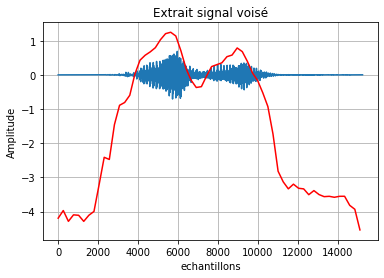

In [122]:
plt.figure(1)
plt.plot(np.arange(len(signalF)),signalF)
plt.plot(range(0,len(signalF),256),E,color='red')
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Extrait signal voisé')
plt.grid(True)
plt.show()

***Peut-on repérer les voyelles facilement avec cette représentation ?***

Oui, on remarque des pics du log-énergie lorsqu'il y a des voyelles.

***Calculez le cepstre de l'extrait de signal. Affichez le. Où se trouve l'excitation liée à la vibration des cordes vocales ?***

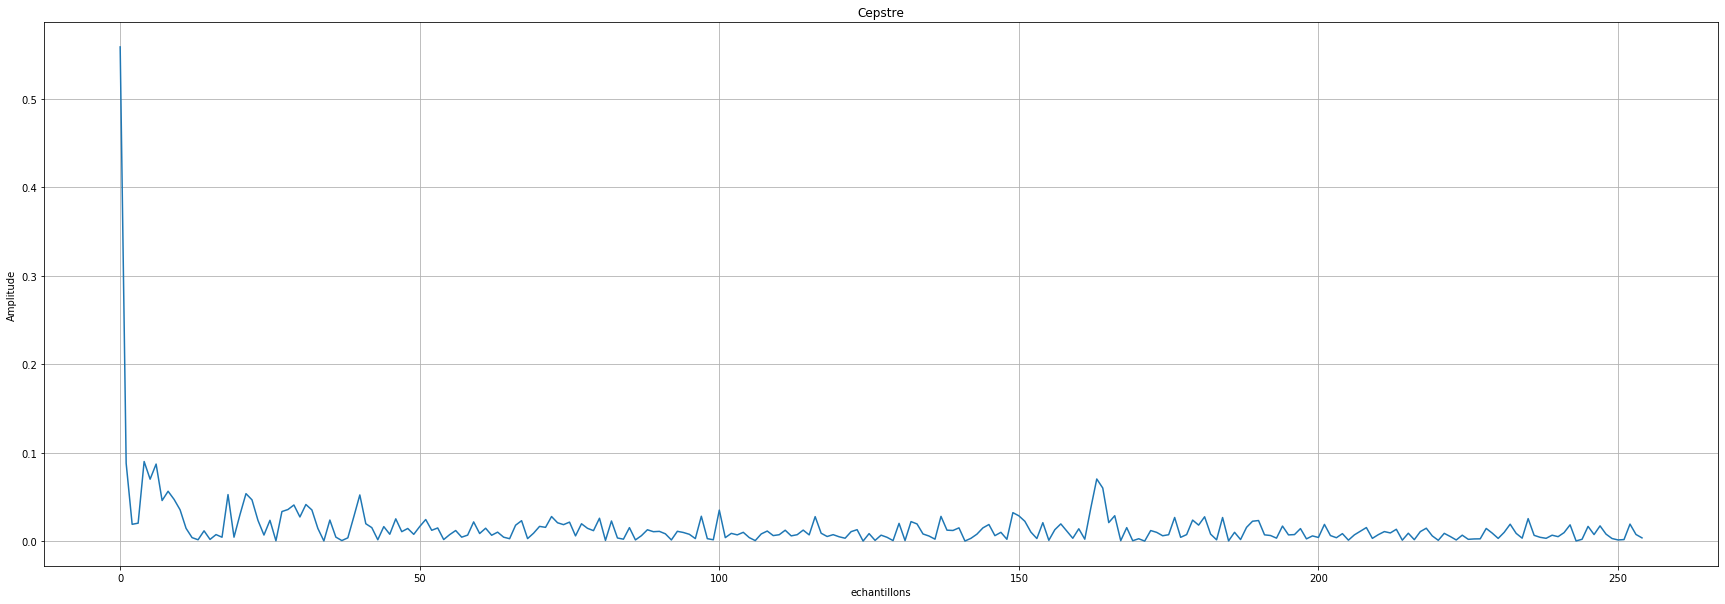

In [91]:
# A vous...
logSignal = np.log10(np.abs(np.fft.fft(extrait)))
cepstre = np.fft.ifft(logSignal)

plt.figure(1,figsize=(30,10))
plt.plot(np.arange(255),np.abs(cepstre[1:256]))
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Cepstre')
plt.grid(True)
plt.show()

***Calculez et affichez le spectre lissé de cet extrait.***

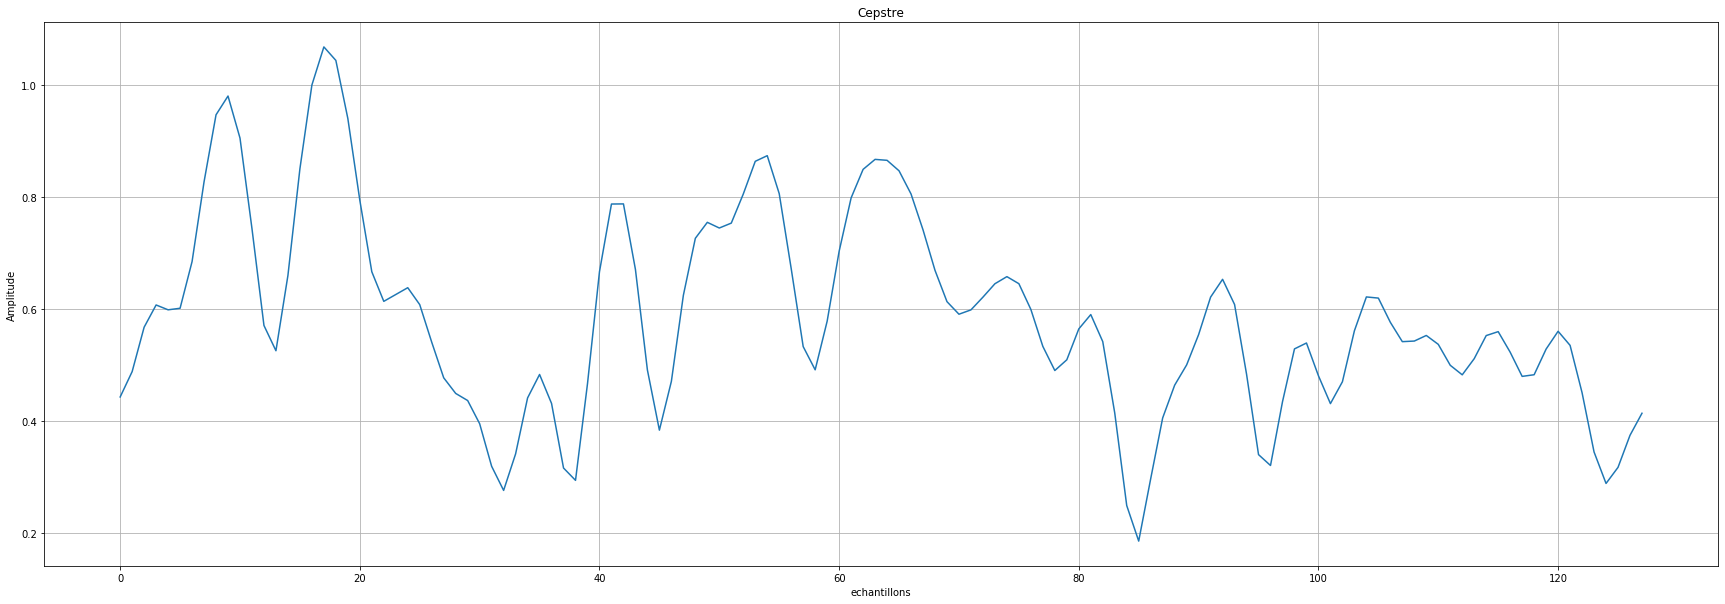

In [97]:
# A vous...
spLisse = np.abs(np.fft.fft(cepstre[1:50],n=256))

plt.figure(1,figsize=(30,10))
plt.plot(np.arange(128),spLisse[:128])
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('Cepstre')
plt.grid(True)
plt.show()

***En utilisant librosa, affichez une matrice des 12 premiers coefficients MFCC du signal de départ.***

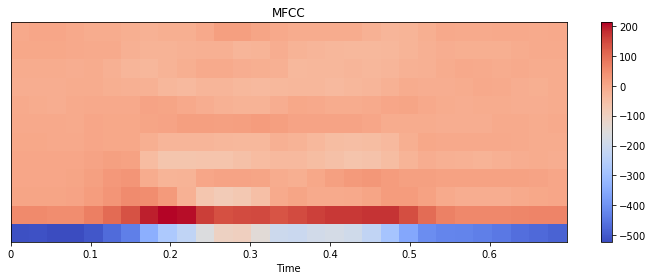

In [103]:
# A vous...
M = librosa.feature.mfcc(signalF,sr=fe,n_mfcc=12)

plt.figure(figsize=(10, 4))
librosa.display.specshow(M, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

***Affichez dans un graphique la 1ère dimension de la matrice MFCC. Affichez en dessous la courbe de l'énergie que vous avez calculé.
Y a-t-il une corrélation entre ces deux diagrammes  ?***

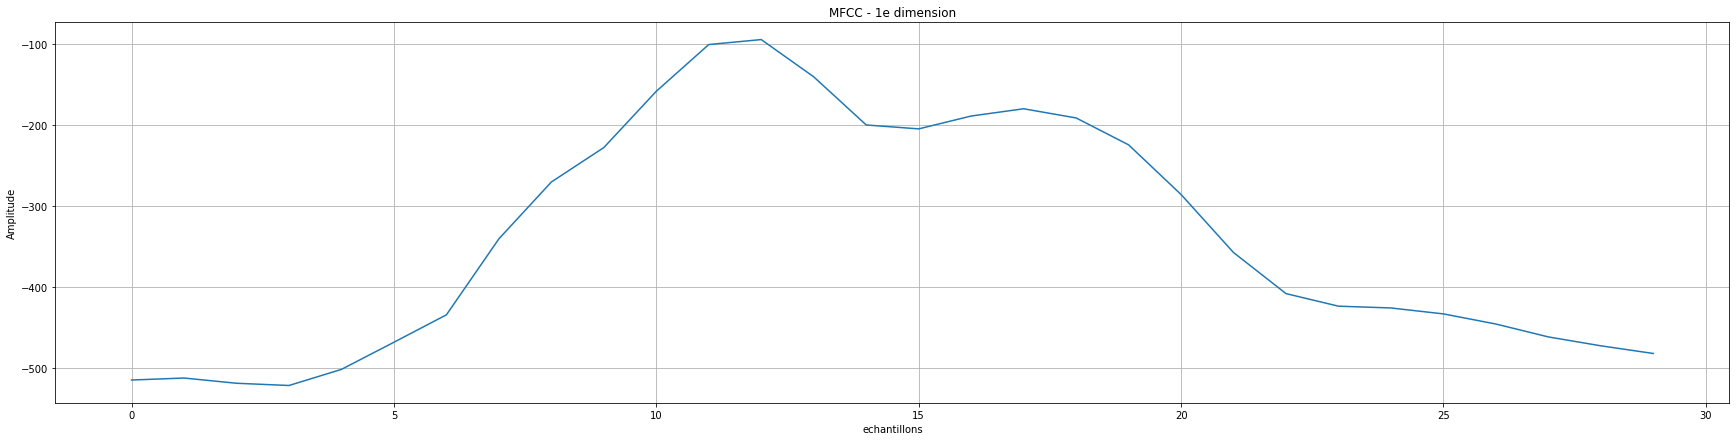

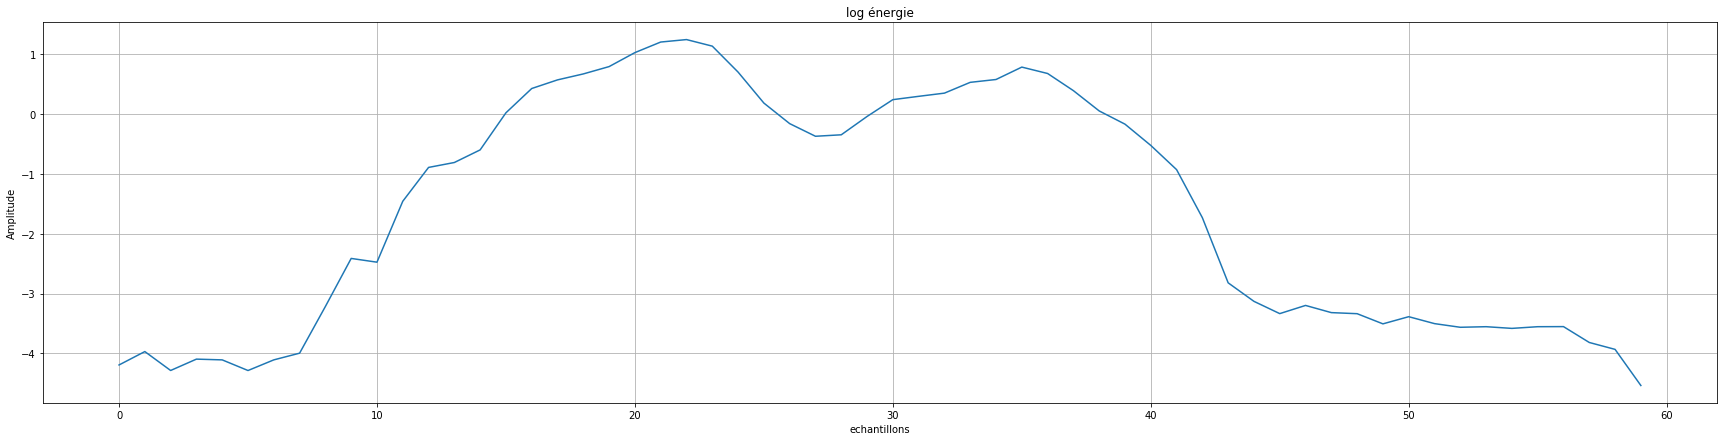

In [125]:
plt.figure(1,figsize=(30,7))
plt.plot(range(len(M[0])),M[0])
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('MFCC - 1e dimension')
plt.grid(True)
plt.show()

plt.figure(2,figsize=(30,7))
plt.plot(range(len(E)),E)
plt.xlabel('echantillons')
plt.ylabel('Amplitude')
plt.title('log énergie')
plt.grid(True)
plt.show()


On remarque bien la forte corrélation entre les deux courbes. Leurs pics répresentent les voyelles.